#  Market Segmentation - Clustering

In [2]:
airlines = read.csv("../Csv_Files/AirlinesCluster.csv")

In [3]:
str(airlines)

'data.frame':	3999 obs. of  7 variables:
 $ Balance        : int  28143 19244 41354 14776 97752 16420 84914 20856 443003 104860 ...
 $ QualMiles      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ BonusMiles     : int  174 215 4123 500 43300 0 27482 5250 1753 28426 ...
 $ BonusTrans     : int  1 2 4 1 26 0 25 4 43 28 ...
 $ FlightMiles    : int  0 0 0 0 2077 0 0 250 3850 1150 ...
 $ FlightTrans    : int  0 0 0 0 4 0 0 1 12 3 ...
 $ DaysSinceEnroll: int  7000 6968 7034 6952 6935 6942 6994 6938 6948 6931 ...


In [4]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


Preprocess and Normalize the features

In [5]:
preproc = preProcess(airlines)

In [6]:
airlinesNorm = predict(preproc, airlines)

Compute the euclidean distance

In [7]:
distances = dist(airlinesNorm, method = "euclidean")

Extract clusters

In [8]:
airCluster = hclust(distances, method = "ward") 

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


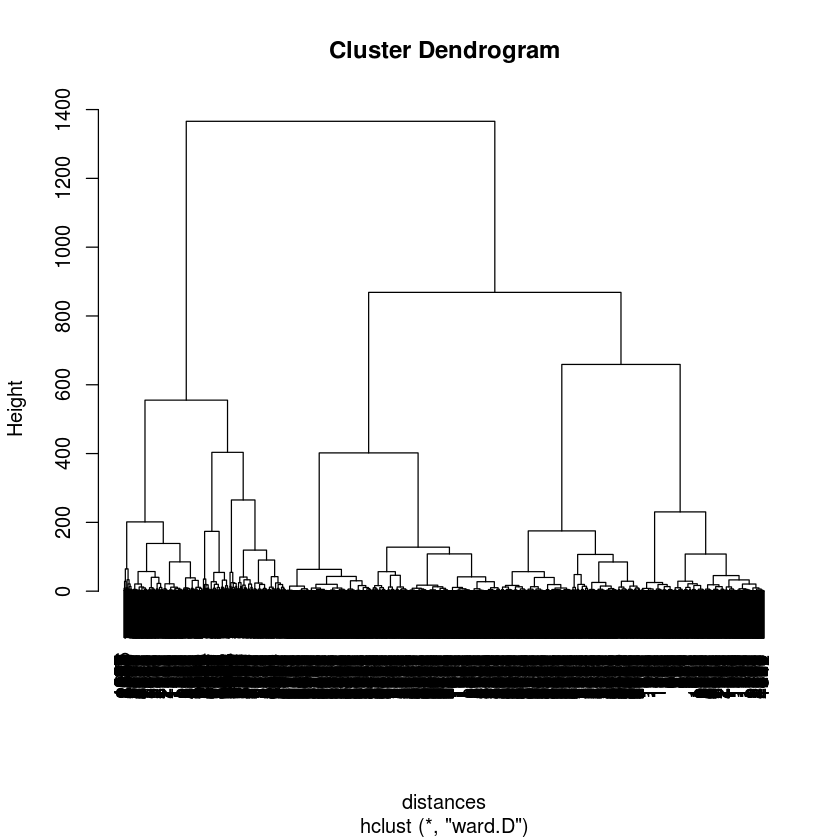

In [9]:
plot(airCluster)

Define 5 clusters

In [10]:
clusterGroups = cutree(airCluster, k = 5)

In [11]:
table(clusterGroups)


clusterGroups
   1    2    3    4    5 
 776  519  494  868 1342 

Compute the averages of each feature in the cluster to understand the data

In [12]:
lapply(split(airlines, clusterGroups), colMeans)


$`1`
        Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
   5.786690e+04    6.443299e-01    1.036012e+04    1.082345e+01    8.318428e+01 
    FlightTrans DaysSinceEnroll 
   3.028351e-01    6.235365e+03 

$`2`
        Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
   1.106693e+05    1.065983e+03    2.288176e+04    1.822929e+01    2.613418e+03 
    FlightTrans DaysSinceEnroll 
   7.402697e+00    4.402414e+03 

$`3`
        Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
   1.981916e+05    3.034615e+01    5.579586e+04    1.966397e+01    3.276761e+02 
    FlightTrans DaysSinceEnroll 
   1.068826e+00    5.615709e+03 

$`4`
        Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
   52335.913594        4.847926    20788.766129       17.087558      111.573733 
    FlightTrans DaysSinceEnroll 
       0.344470     2840.822581 

$`5`
        Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
   3.625591e+04    2.511177e+00    2.264788e+03    2.973174e+00    1.193219e+02 
    FlightTrans DaysSinceEnroll 
   4.388972e-01    3.060081e+03

Cluster 1: infrequent but loyal customers



Cluster 2: customers with huge miles procured through flight transactions



Cluster 3: customers with huge miles procured through non-flight transactions


Cluster 4: new customers procuring miles through non-flight transactions




Cluster 5: infrequent and new customers